<a href="https://colab.research.google.com/github/snad0/Car_Price_prediction/blob/main/Bank_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Fraud.csv")

## **Data Analysis**

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [ ]:
df.loc[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [ ]:
#finding out the transactions which are flagged to be fraud

print("Type of Transaction Flagged :", df.loc[df.isFlaggedFraud == 1].type.drop_duplicates().values)

Type of Transaction Flagged : ['TRANSFER']


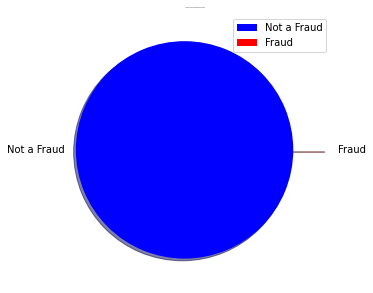

In [ ]:
labels = ['Not a Fraud', 'Fraud']
colors = ['blue', 'red']
size = [6362604, 16]
explode = [0.1,0.21]

plt.rcParams['figure.figsize'] = (5,5)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('share of frauds amongst the customers',fontsize = 1)
plt.legend()
plt.show()

In [ ]:
#checking no of fraud transactions

df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

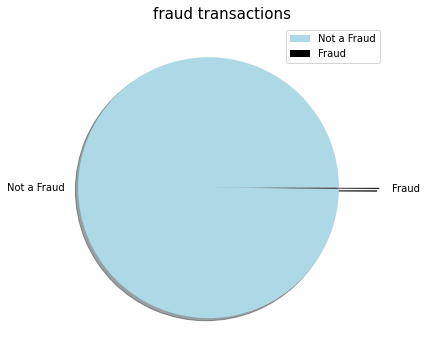

In [ ]:
#Plotting fraud transactions
labels = ['Not a Fraud', 'Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('fraud transactions',fontsize =15)
plt.legend()
plt.show()

In [ ]:
df.newbalanceDest.value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [ ]:
#Checking for missing/Null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

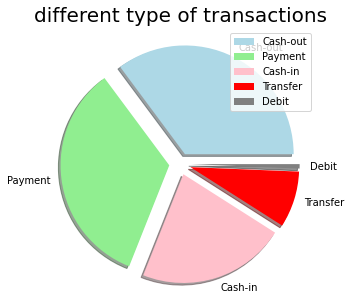

In [ ]:
#plotting different labels
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['lightblue', 'lightgreen', 'pink', 'red', 'gray']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('different type of transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# no we have to find the numerical variables and categoical features
Numerical_features=[features for features in df.columns if df[features].dtype !='O'] #it will return a list of all features that are numbers
print('number of numerical variable', len(Numerical_features))

number of numerical variable 8


In [ ]:
Numerical_features

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
#checking discrete and contineous features
discrete_features=[feature for feature in Numerical_features if len(df[feature].unique()) < 25 ]
print(len(discrete_features),"discrete features")
discrete_features

2 discrete features


['isFraud', 'isFlaggedFraud']

In [ ]:
contineous_feature=[feature for feature in Numerical_features if feature not in discrete_features]
print(len(contineous_feature),"contineous_feature")
contineous_feature

6 contineous_feature


['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

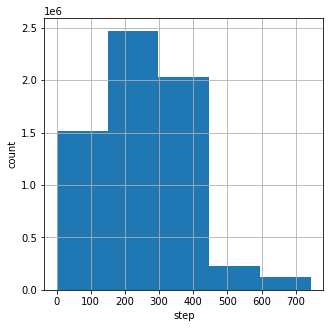

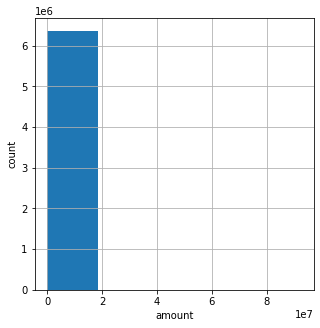

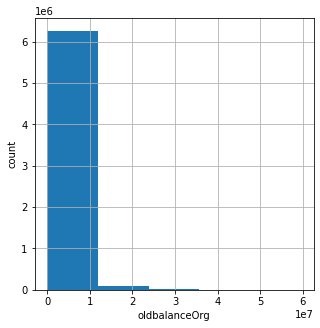

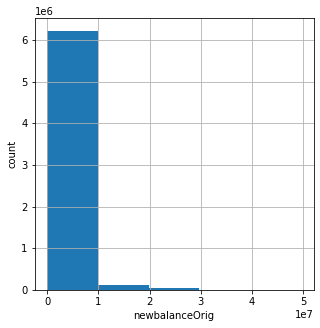

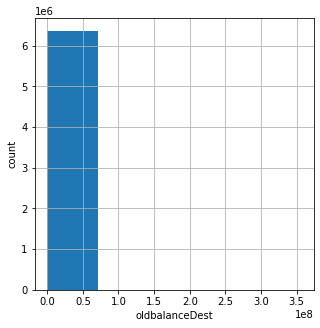

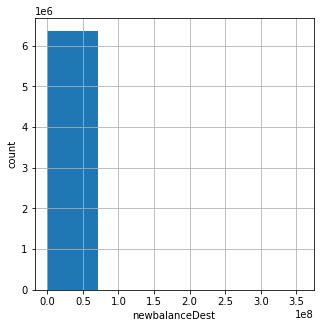

In [ ]:
for feature in contineous_feature:

    data=df.copy()
    data[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

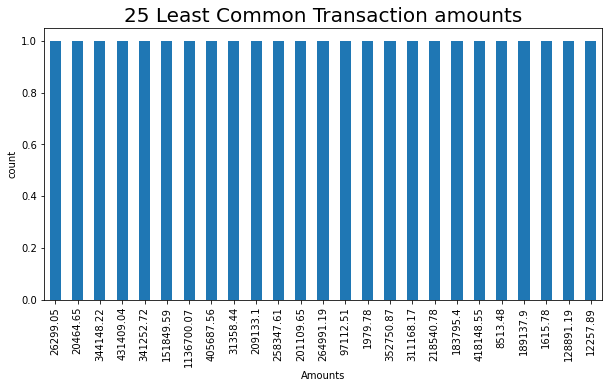

In [ ]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 5)

df['amount'].value_counts().tail(25).plot.bar()
plt.title('25 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

In [ ]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.
#this will be usefull for feature selection

print('Type of fraudulent transactions {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)) )

Type of fraudulent transactions ['TRANSFER', 'CASH_OUT']


In [ ]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]
print ('Total fraud TRANSFER = {}'.format(len(dfFraudTransfer)))
print ('total fraud CASH_OUT = {}'.format(len(dfFraudCashout)))

Total fraud TRANSFER = 4097
total fraud CASH_OUT = 4116


In [ ]:
# defining a dataset containing only transfer type of transactions

Transferdf = data.loc[data['type'] == 'TRANSFER']

Transferdf = pd.DataFrame(Transferdf)

Transferdf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0


In [ ]:
Transferdf.shape

(532909, 11)

 dependent and independent features

## **Feature engg**

In [ ]:
#  dependent and independent features
#i am going to take only those featuires where type is Transfer or Out because for other features the label is always zero

X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
X.shape

(2770409, 11)

In [ ]:
# removing unwanted features
#we dont need these 2 columns for training
X = X.drop(['nameDest','nameOrig'], axis = 1)
X.shape

(2770409, 9)

In [ ]:
# encoding type feature
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [ ]:
# checking if there is error in balance transactions
X['faultyBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['faultyBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


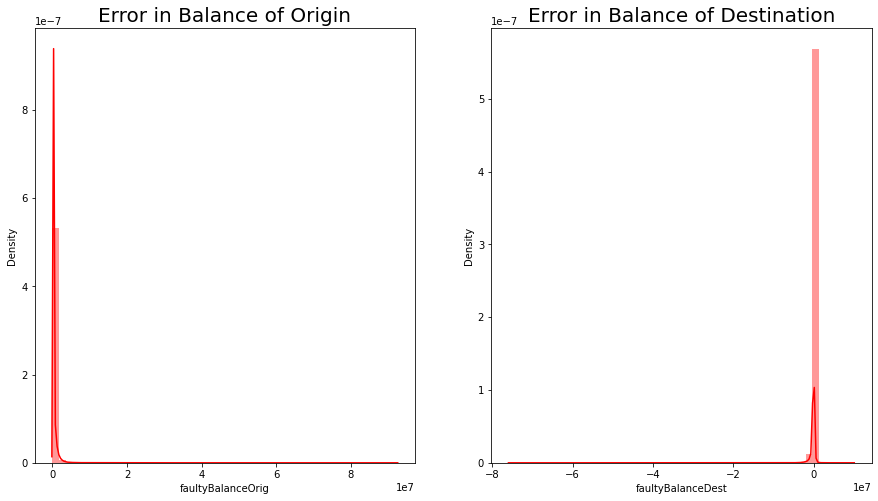

In [ ]:

# visualizing the distribution of error in balance

import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)
plt.subplot(121)
sns.distplot(X['faultyBalanceOrig'], color = 'red')
plt.title('Error in Balance of Origin', fontsize = 20)
plt.subplot(122)
sns.distplot(X['faultyBalanceDest'], color = 'red')
plt.title('Error in Balance of Destination', fontsize = 20)

plt.show()

In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,faultyBalanceOrig,faultyBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [ ]:
#Dependent and independent variables
Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape) #now we can use them to train

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [ ]:
#as the data is imbalanced we need to do upsampling
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_resample(X, Y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (5524392, 10)
Shape of y: (5524392,)


# Model Building

In [ ]:
# Train test splitting+

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print(" x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

 x_train shape:  (4419513, 10)
x_test shape:  (1104879, 10)
y_train shape:  (4419513,)
y_test shape:  (1104879,)


In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Using XGBOOST

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(X_train, y_train)

[10:40:05] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier()

In [ ]:
model.save_model('xgbclassifier.model')

# model Evaluation

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.998066930320876


In [ ]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[552971    149]
 [  1833 549926]]


In [ ]:
#Comparing actual outcomes v/s predicted outcomes
from sklearn.metrics import accuracy_score
y_pred = (y_pred > 0.5)

accuracy=accuracy_score(y_test,y_pred)
print( accuracy)

0.9982061384097263


We cal also apply different classification models to evaluate which one gives better accuracy


In [ ]:
#key features
importan_feature = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importan_feature

,feature,importance
8,faultyBalanceOrig,0.759795
4,newbalanceOrig,0.178510
2,amount,0.045663
3,oldbalanceOrg,0.003883
9,faultyBalanceDest,0.003725
5,oldbalanceDest,0.002506
0,step,0.002391
6,newbalanceDest,0.002073
1,type,0.001454
7,isFlaggedFraud,0.000000


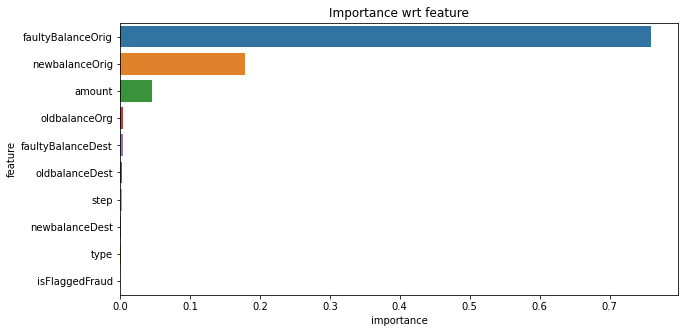

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Importance wrt feature')
sns.barplot(data=importan_feature, x='importance', y='feature');

so the most important factor to detect the fraud is data belonging to customer who started the transaction and amount of transaction all the other features are contributing very less


To prevent these bank frauds first thing is to apply such models on their servers to track such transactions and analyse patterns of transactions by every user 